In [983]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


In [984]:
df=pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


# Step 1
## Load the Data

In [985]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [986]:
df=pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")

In [987]:
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


# Step 2
## Understand the Data

In [988]:
df.shape

(10000, 12)

In [989]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [990]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [991]:
df.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


# Step 3
## Identify missing value

In [992]:
for col in df.columns:
    count = df[col].isnull().sum()
    print(f"{col}: {count}")

roll_no: 1
gender: 18
race_ethnicity: 23
parental_level_of_education: 22
lunch: 24
test_preparation_course: 23
math_score: 24
reading_score: 25
writing_score: 24
science_score: 23
total_score: 19
grade: 3


We can also write like this

In [993]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

<Axes: >

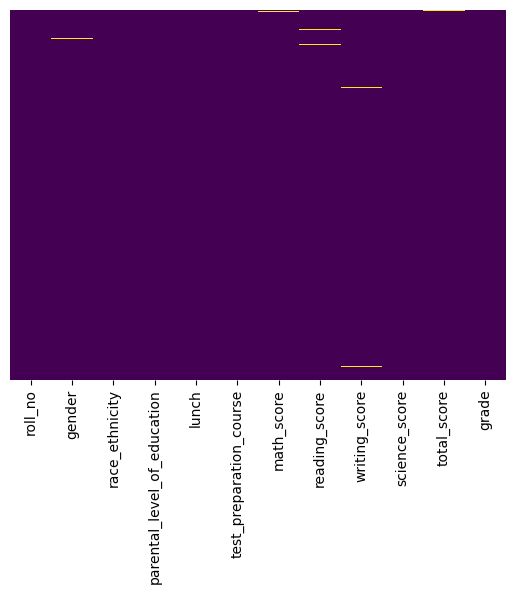

In [994]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)

In [995]:
numeric_cols = df.select_dtypes(include="float64").columns

In [996]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [997]:
df['gender'].unique()

array(['male', nan, 'Boy', '\\tmale', 'female', 'Girl'], dtype=object)

In [998]:
df['race_ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'A', nan,
       'C', 'D', 'group C\\n', 'B', 'E'], dtype=object)

In [999]:
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


In [1000]:
df['gender'].unique()

array(['male', 'female', 'Boy', '\\tmale', 'Girl'], dtype=object)

In [1001]:
df['race_ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'A', 'C',
       'D', 'group C\\n', 'B', 'E'], dtype=object)

In [1002]:
df.isna().sum()

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

# Step 4
## Handle Duplicates

In [1003]:
df.duplicated().sum()

0

we dont have any duplicate.

In [1004]:
df.drop_duplicates()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,std-9996,female,group C,some college,1.0,0.0,78,60.0,46.0,58.0,242.0,C
9996,std-9997,female,group C,bachelor's degree,1.0,0.0,37,92.0,99.0,73.0,301.0,B
9997,std-9998,female,group B,associate's degree,1.0,1.0,70,71.0,100.0,90.0,331.0,A
9998,std-9999,female,group B,some high school,1.0,0.0,87,60.0,100.0,89.0,336.0,A


# Step 5
## Check for Inconsistent or Faulty Data 

In [1005]:
df.columns

Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [1006]:
df['gender'].unique()

array(['male', 'female', 'Boy', '\\tmale', 'Girl'], dtype=object)

In [1007]:
dict1={'Boy':'boy',
       'female':'female',
       'male':'male',
       'Girl':'girl',
    '\\tmale':'male'}
df.gender=df.gender.map(dict1)

In [1008]:
df['gender'].unique()

array(['male', 'female', 'boy', 'girl'], dtype=object)

In [1009]:
df['race_ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A', 'A', 'C',
       'D', 'group C\\n', 'B', 'E'], dtype=object)

In [1010]:
dict2={'group D':'Group D',
      'group B':'Group B',
      'group C':'Group C',
      'group E':'Group E',
      'group A':'Group A',
      'A':'Group A',
      'B':'Group B',
      'C':'Group C',
      'D':'Group D',
      'E':'Group E',
      'group C\\n':'Group C'}
df.race_ethnicity=df.race_ethnicity.map(dict2)

In [1011]:
df['race_ethnicity'].unique()

array(['Group D', 'Group B', 'Group C', 'Group E', 'Group A'],
      dtype=object)

In [1012]:
df['parental_level_of_education'].unique()

array(['some college', 'high school', "master's degree",
       "associate's degree", 'some high school', "bachelor's degree"],
      dtype=object)

In [1013]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')

# Step 6
## Drop Irrelevant Columns 

In [1014]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      10000 non-null  object 
 1   gender                       10000 non-null  object 
 2   race_ethnicity               10000 non-null  object 
 3   parental_level_of_education  10000 non-null  object 
 4   lunch                        10000 non-null  float64
 5   test_preparation_course      10000 non-null  float64
 6   math_score                   9999 non-null   float64
 7   reading_score                10000 non-null  float64
 8   writing_score                10000 non-null  float64
 9   science_score                10000 non-null  float64
 10  total_score                  10000 non-null  float64
 11  grade                        10000 non-null  object 
dtypes: float64(7), object(5)
memory usage: 937.6+ KB


In [1015]:
df.drop(columns=['roll_no'],inplace = True)
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [1016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       10000 non-null  object 
 1   race_ethnicity               10000 non-null  object 
 2   parental_level_of_education  10000 non-null  object 
 3   lunch                        10000 non-null  float64
 4   test_preparation_course      10000 non-null  float64
 5   math_score                   9999 non-null   float64
 6   reading_score                10000 non-null  float64
 7   writing_score                10000 non-null  float64
 8   science_score                10000 non-null  float64
 9   total_score                  10000 non-null  float64
 10  grade                        10000 non-null  object 
dtypes: float64(7), object(4)
memory usage: 859.5+ KB


# Step 7
## Convert Data Types

In [1017]:
df['grade']=df['grade'].astype('category')
df['gender']=df['gender'].astype('category')
df['race_ethnicity']=df['race_ethnicity'].astype('category')
df['parental_level_of_education']=df['parental_level_of_education'].astype('category')

In [1018]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       10000 non-null  category
 1   race_ethnicity               10000 non-null  category
 2   parental_level_of_education  10000 non-null  category
 3   lunch                        10000 non-null  float64 
 4   test_preparation_course      10000 non-null  float64 
 5   math_score                   9999 non-null   float64 
 6   reading_score                10000 non-null  float64 
 7   writing_score                10000 non-null  float64 
 8   science_score                10000 non-null  float64 
 9   total_score                  10000 non-null  float64 
 10  grade                        10000 non-null  category
dtypes: category(4), float64(7)
memory usage: 586.9 KB


# Step 8
## Explore Distributions 

### Use .value_counts() to explore the distribution of categorical variables (e.g., gender, grade). 


In [1019]:
df.gender.value_counts()

gender
female    5001
male      4983
girl        10
boy          6
Name: count, dtype: int64

In [1020]:
df.race_ethnicity.value_counts()

race_ethnicity
Group C    2951
Group D    2572
Group B    1900
Group E    1513
Group A    1064
Name: count, dtype: int64

In [1021]:
df.parental_level_of_education.value_counts()

parental_level_of_education
some college          2294
high school           1987
associate's degree    1905
some high school      1742
bachelor's degree     1361
master's degree        711
Name: count, dtype: int64

In [1022]:
df.grade.value_counts()

grade
B       5662
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64

In [1023]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       10000 non-null  category
 1   race_ethnicity               10000 non-null  category
 2   parental_level_of_education  10000 non-null  category
 3   lunch                        10000 non-null  float64 
 4   test_preparation_course      10000 non-null  float64 
 5   math_score                   9999 non-null   float64 
 6   reading_score                10000 non-null  float64 
 7   writing_score                10000 non-null  float64 
 8   science_score                10000 non-null  float64 
 9   total_score                  10000 non-null  float64 
 10  grade                        10000 non-null  category
dtypes: category(4), float64(7)
memory usage: 586.9 KB


### Plot the distributions of numeric variables (math_score, reading_score, etc.) using histograms.. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


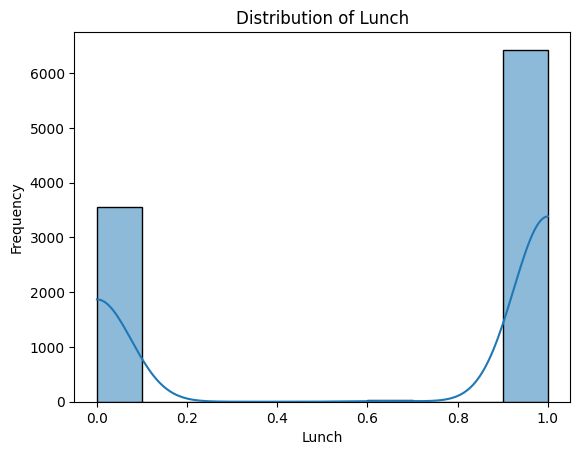

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


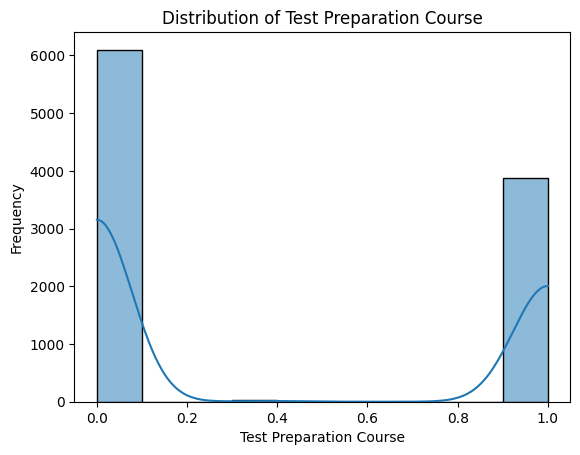

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


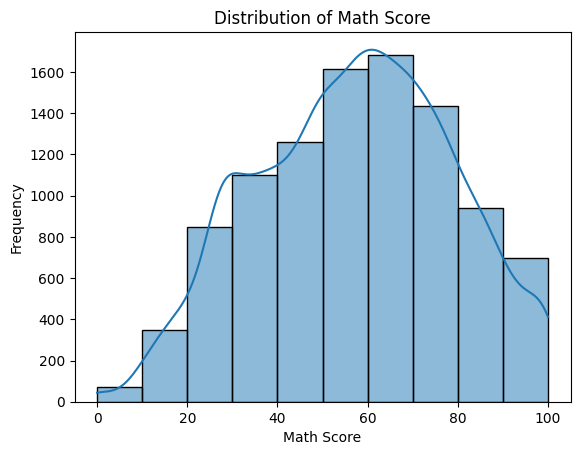

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


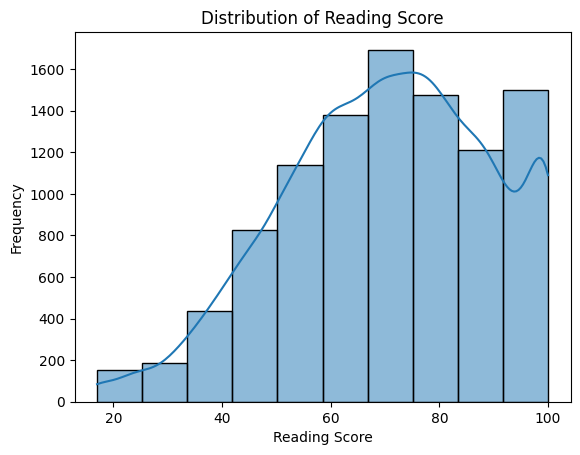

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


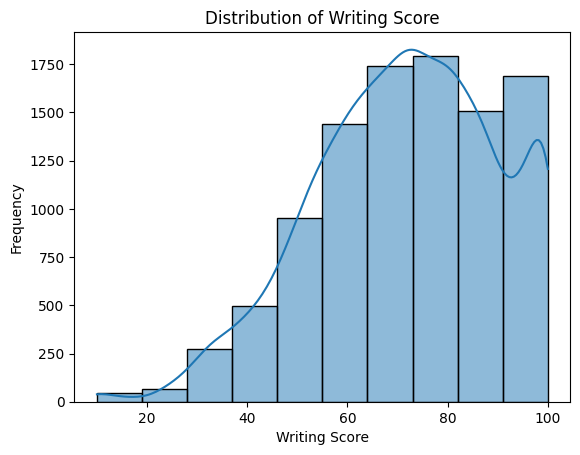

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


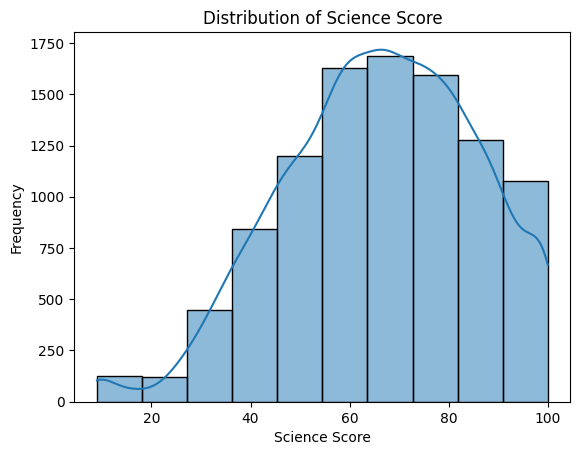

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


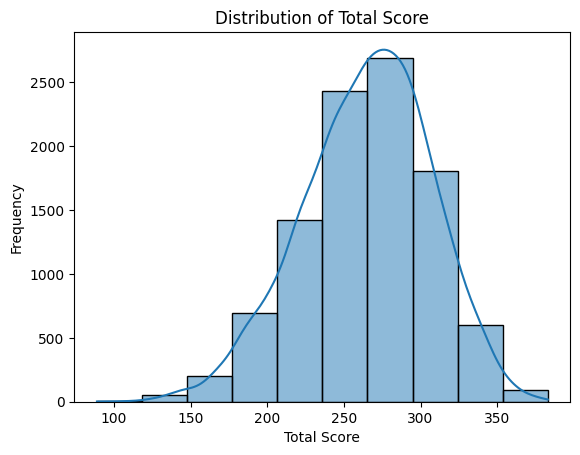

In [1024]:
df1 = df.select_dtypes(include=['float64']).columns
for column in df1:
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(f"Distribution of {column.replace('_', ' ').title()}")
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.show()


### Use box plots (sns.boxplot) to detect outliers in numeric columns. 

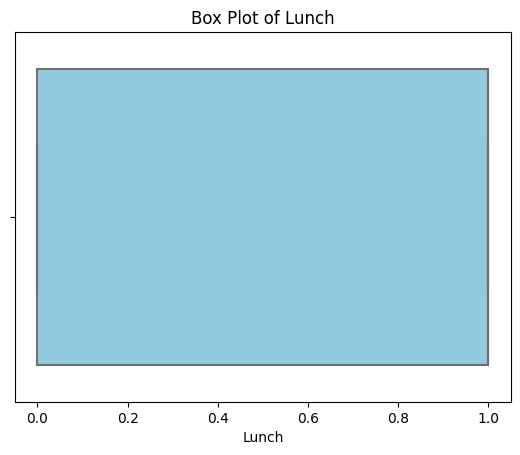

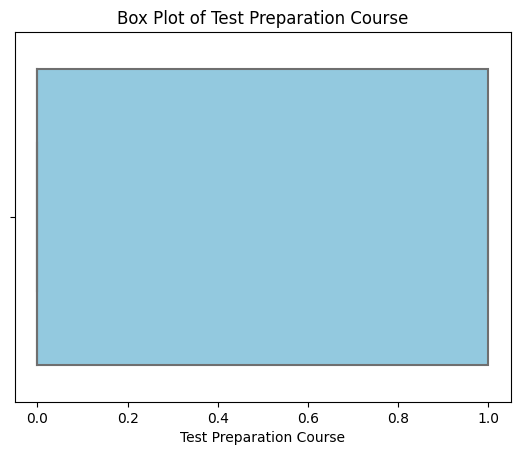

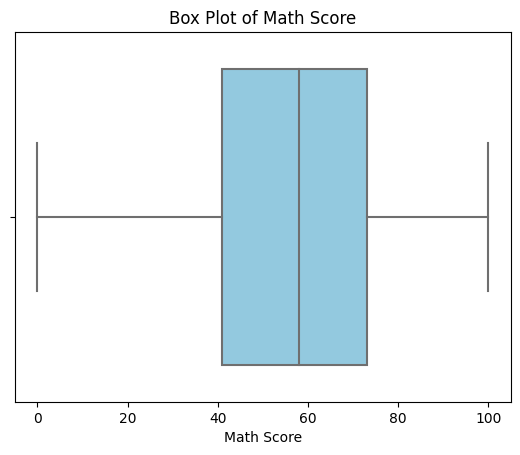

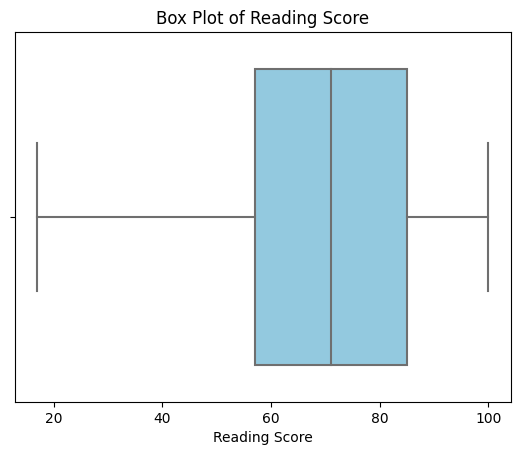

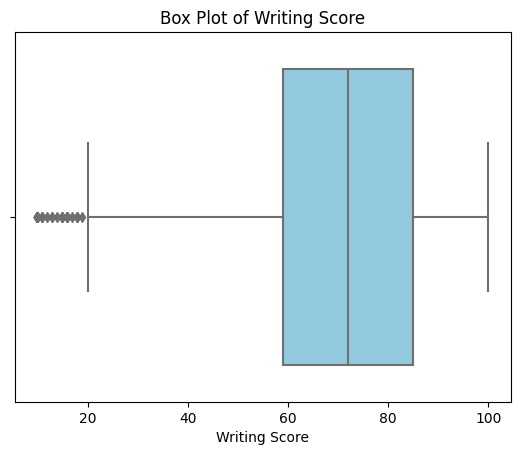

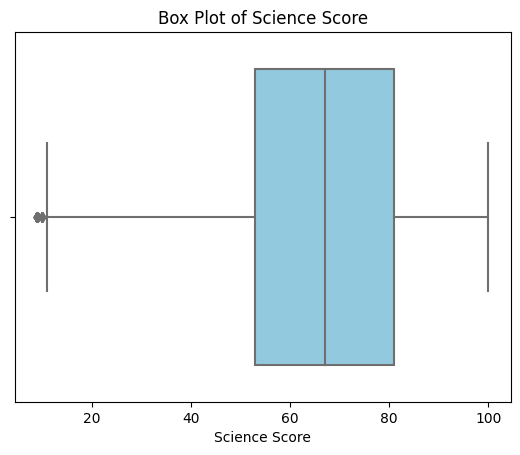

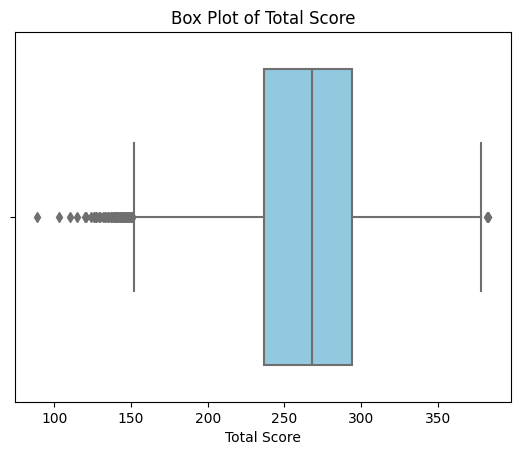

In [1025]:
for column in df1:
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Box Plot of {column.replace('_', ' ').title()}")
    plt.xlabel(column.replace('_', ' ').title())
    plt.show()


In [1026]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       10000 non-null  category
 1   race_ethnicity               10000 non-null  category
 2   parental_level_of_education  10000 non-null  category
 3   lunch                        10000 non-null  float64 
 4   test_preparation_course      10000 non-null  float64 
 5   math_score                   9999 non-null   float64 
 6   reading_score                10000 non-null  float64 
 7   writing_score                10000 non-null  float64 
 8   science_score                10000 non-null  float64 
 9   total_score                  10000 non-null  float64 
 10  grade                        10000 non-null  category
dtypes: category(4), float64(7)
memory usage: 586.9 KB


# Step 9 
## Handle Outliers 

### Use box plots or the Interquartile Range (IQR) method to identify outliers in numeric columns. 

In [1027]:
df1=df.select_dtypes(include=['float64'])

In [1028]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
outliers = (df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))
outliers

,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


# Step 10 
## Encode Categorical Variables

1- Use one-hot encoding or label encoding to convert categorical columns into numeric formats for analysis.

2- Use pd.get_dummies() for one-hot encoding or LabelEncoder for label encoding. 

In [1029]:
df2 = df.select_dtypes(include=['category'])

In [1030]:
df3 = pd.get_dummies(df2)
df3

,gender_boy,gender_female,gender_girl,gender_male,race_ethnicity_Group A,race_ethnicity_Group B,race_ethnicity_Group C,race_ethnicity_Group D,race_ethnicity_Group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,grade_A,grade_B,grade_C,grade_D,grade_Fail
0,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
1,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False
9996,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
9997,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False
9998,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False


# Step 11
## Correlation Analysis 

Use .corr() to find correlations between numeric variables. 

In [1031]:
df4 = df3.corr()
df4

,gender_boy,gender_female,gender_girl,gender_male,race_ethnicity_Group A,race_ethnicity_Group B,race_ethnicity_Group C,race_ethnicity_Group D,race_ethnicity_Group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,grade_A,grade_B,grade_C,grade_D,grade_Fail
gender_boy,1.000000,-0.024507,-0.000775,-0.024419,-0.008455,0.019362,0.002054,-0.005075,-0.010345,-0.011886,0.002184,0.008267,-0.006779,0.015770,-0.011254,0.006517,0.004967,-0.005708,-0.006571,-0.001935
gender_female,-0.024507,1.000000,-0.031645,-0.996805,0.077116,-0.040882,0.009299,-0.023911,-0.004270,0.023585,-0.040617,0.005665,-0.037800,-0.023893,0.058440,0.065498,0.226165,-0.171964,-0.194702,-0.073905
gender_girl,-0.000775,-0.031645,1.000000,-0.031531,-0.010917,0.000806,-0.006597,0.003098,0.013129,0.008822,-0.003331,-0.007826,0.003558,-0.002212,0.002152,0.012093,0.002158,-0.004995,-0.008485,-0.002499
gender_male,-0.024419,-0.996805,-0.031531,1.000000,-0.076013,0.039883,-0.008982,0.023964,0.003947,-0.023561,0.040720,-0.005575,0.037907,0.023261,-0.058025,-0.066582,-0.226546,0.172560,0.195561,0.074158
race_ethnicity_Group A,-0.008455,0.077116,-0.010917,-0.076013,1.000000,-0.167122,-0.223265,-0.203048,-0.145694,0.008513,-0.010224,-0.006841,0.006751,-0.000063,0.003122,-0.005865,0.011493,-0.009777,0.007266,-0.018992
race_ethnicity_Group B,0.019362,-0.040882,0.000806,0.039883,-0.167122,1.000000,-0.313368,-0.284993,-0.204492,0.002629,0.009969,0.011160,0.008838,-0.014466,-0.013428,0.008214,0.000627,-0.012739,0.011727,0.000714
race_ethnicity_Group C,0.002054,0.009299,-0.006597,-0.008982,-0.223265,-0.313368,1.000000,-0.380733,-0.273189,0.001583,-0.004240,0.008042,-0.004109,-0.008844,0.006322,0.001705,0.010239,-0.002995,-0.015785,-0.003621
race_ethnicity_Group D,-0.005075,-0.023911,0.003098,0.023964,-0.203048,-0.284993,-0.380733,1.000000,-0.248452,0.008176,0.000634,-0.008059,-0.004335,0.017948,-0.017519,0.006775,-0.017203,0.011492,0.003126,0.008900
race_ethnicity_Group E,-0.010345,-0.004270,0.013129,0.003947,-0.145694,-0.204492,-0.273189,-0.248452,1.000000,-0.022191,0.002507,-0.006737,-0.004967,0.005255,0.025337,-0.014379,-0.002624,0.012154,-0.002813,0.009312
parental_level_of_education_associate's degree,-0.011886,0.023585,0.008822,-0.023561,0.008513,0.002629,0.001583,0.008176,-0.022191,1.000000,-0.192547,-0.241569,-0.134211,-0.264680,-0.222805,-0.012621,0.014587,-0.010633,0.006284,-0.005875


### Visualize the correlation matrix using a heatmap (sns.heatmap). 

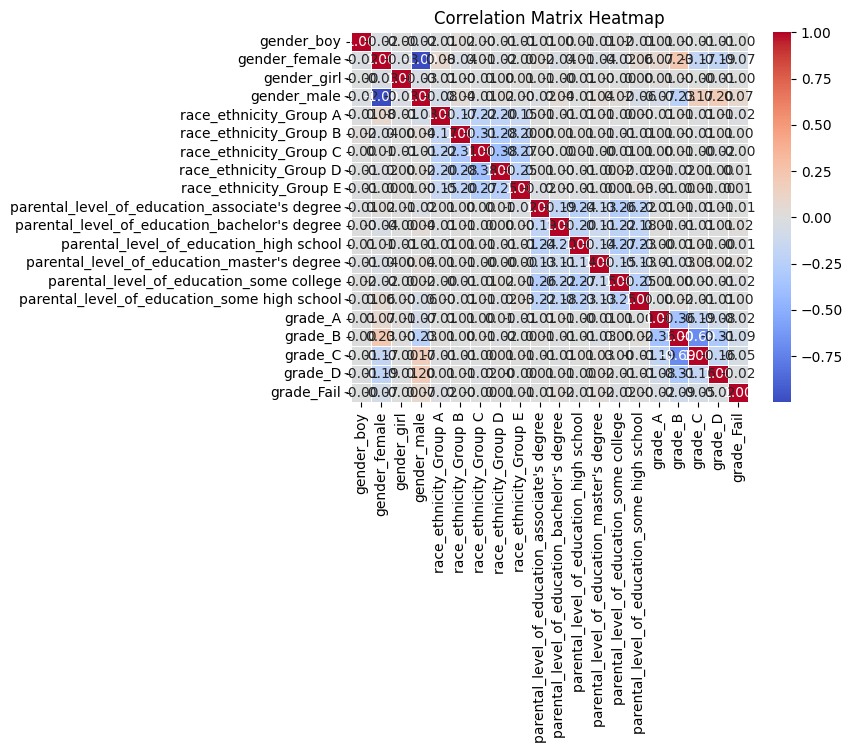

In [1032]:
sns.heatmap(df4,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 12 
## Investigate Relationships 

#### Explore relationships between variables using scatter plots (sns.scatterplot).Example: Compare math_score vs. total_score. 

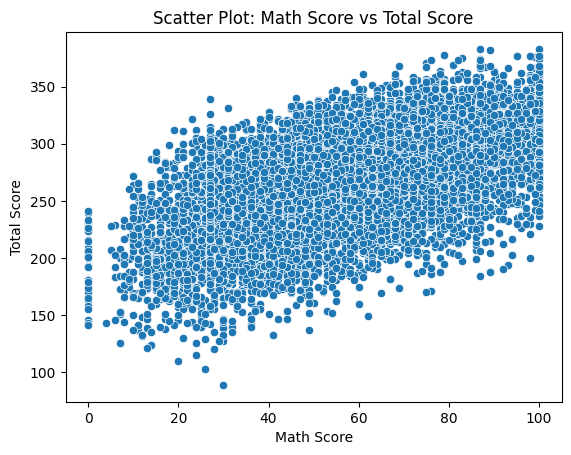

In [1033]:
sns.scatterplot(data=df, x='math_score', y='total_score')
plt.title('Scatter Plot: Math Score vs Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


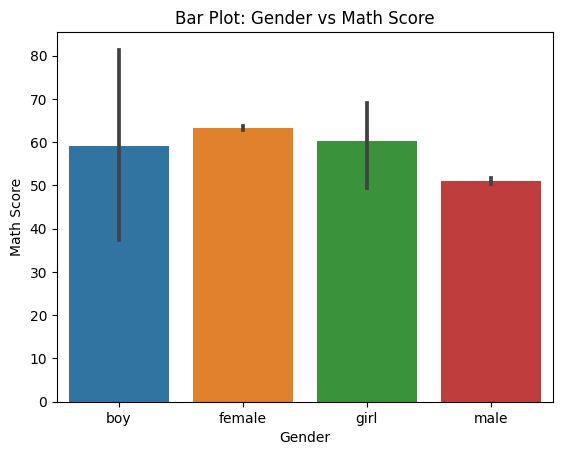

In [1034]:
sns.barplot(data=df, x='gender', y='math_score')
plt.title('Bar Plot: Gender vs Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

#### Use bar plots (sns.barplot) to analyze the impact of categorical variables (e.g., gender or race_ethnicity) on numeric scores. 

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


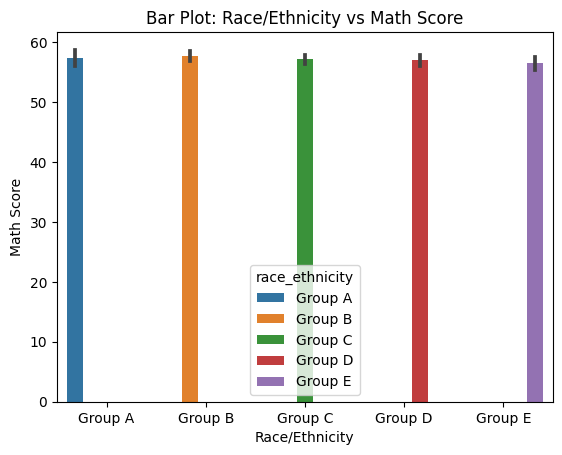

In [1035]:
sns.barplot(data=df, x='race_ethnicity', y='math_score', hue='race_ethnicity')
plt.title('Bar Plot: Race/Ethnicity vs Math Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')
plt.show()

# Step 13 
## Feature Engineering 

### Create new features, if applicable: 
 Example: Add a performance_ratio = total_score / max_score column.

In [1036]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

In [1037]:
max_score = df['total_score'].max()
max_score

383.0

In [1038]:
df['performance_ratio']=np.divide(df['total_score'],max_score)

In [1039]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade',
       'performance_ratio'],
      dtype='object')

####  Bin numeric columns into categories (e.g., "low", "medium", "high") using pd.cut().

In [1040]:
bins = [0,35,70,100]
labels = ['low','medium','high']
df['score_category'] = pd.cut(df['math_score'], bins=bins, labels=labels, right=True)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,performance_ratio,score_category
0,male,Group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,0.621410,high
1,male,Group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,0.856397,medium
2,male,Group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,0.689295,low
3,male,Group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,0.516971,low
4,male,Group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,0.556136,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,female,Group C,some college,1.0,0.0,78.0,60.0,46.0,58.0,242.0,C,0.631854,high
9996,female,Group C,bachelor's degree,1.0,0.0,37.0,92.0,99.0,73.0,301.0,B,0.785901,medium
9997,female,Group B,associate's degree,1.0,1.0,70.0,71.0,100.0,90.0,331.0,A,0.864230,medium
9998,female,Group B,some high school,1.0,0.0,87.0,60.0,100.0,89.0,336.0,A,0.877285,high


In [1041]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       10000 non-null  category
 1   race_ethnicity               10000 non-null  category
 2   parental_level_of_education  10000 non-null  category
 3   lunch                        10000 non-null  float64 
 4   test_preparation_course      10000 non-null  float64 
 5   math_score                   9999 non-null   float64 
 6   reading_score                10000 non-null  float64 
 7   writing_score                10000 non-null  float64 
 8   science_score                10000 non-null  float64 
 9   total_score                  10000 non-null  float64 
 10  grade                        10000 non-null  category
 11  performance_ratio            10000 non-null  float64 
 12  score_category               9966 non-null   category
dtypes:

# Step 14 
## Summarize Findings 
1-  Summarize key insights from the data exploration.

2- Highlight any patterns, anomalies, or trends observed during preprocessing or EEDA

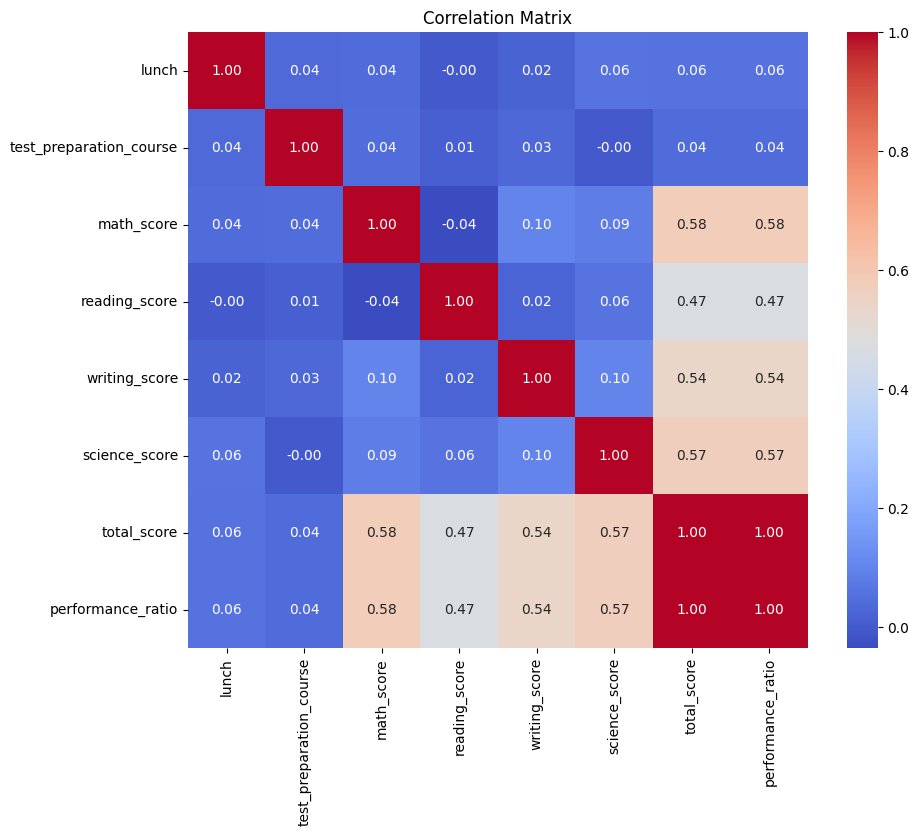

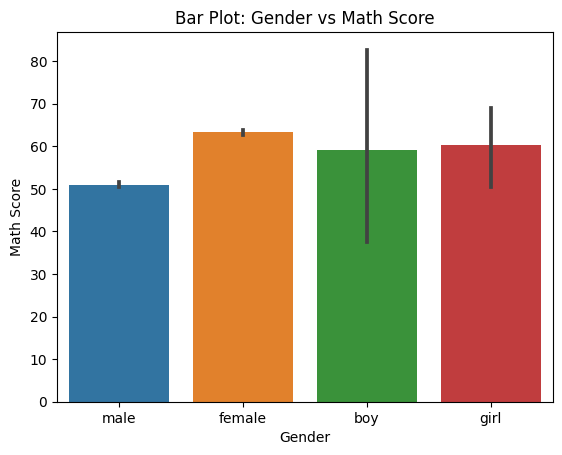

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


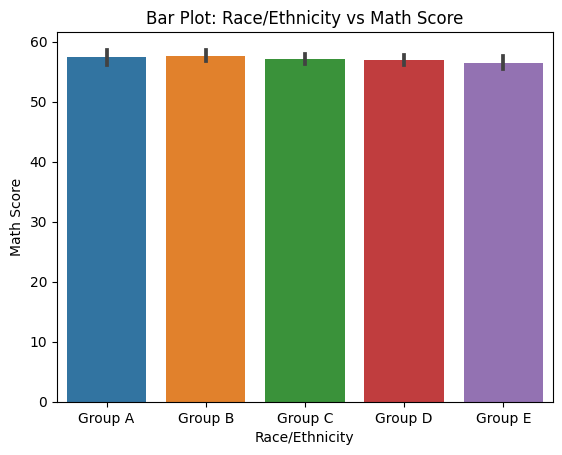

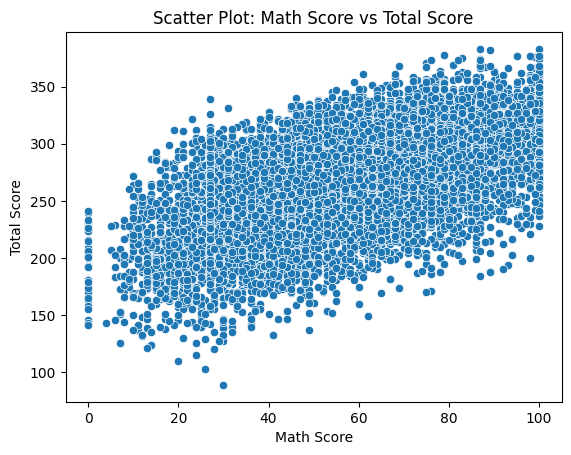

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


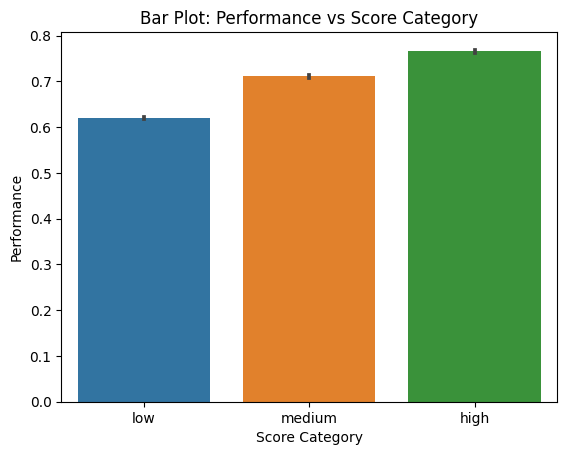

Data Cleaning and Imputation:
Missing values handled for categorical and numeric columns.

Inconsistent Data Handling:
Gender values standardized (e.g., '	male' to 'male').

Outliers:
Outliers in 'math_score' were identified using IQR method.
Outliers removed from 'math_score' column.

Feature Engineering:
Normalized total_score into performance metric.

Binned Score Categories:
Math scores categorized into 'low', 'medium', and 'high' categories.


In [1042]:
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


numeric_cols = df.select_dtypes(include="float64").columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

gender_mapping = {'\tmale': 'male', 'female': 'female'}
df['gender'] = df['gender'].map(gender_mapping).fillna(df['gender'])


df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')


Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['math_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR))

df = df[~outliers]

max_score = df['total_score'].max()
df['performance'] = np.divide(df['total_score'], max_score)

bins = [0, 50, 75, 100]
labels = ['low', 'medium', 'high']
df['score_category'] = pd.cut(df['math_score'], bins=bins, labels=labels, right=False)

correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

sns.barplot(data=df, x='gender', y='math_score')
plt.title('Bar Plot: Gender vs Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

sns.barplot(data=df, x='race_ethnicity', y='math_score')
plt.title('Bar Plot: Race/Ethnicity vs Math Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')
plt.show()

sns.scatterplot(data=df, x='math_score', y='total_score')
plt.title('Scatter Plot: Math Score vs Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.show()


sns.barplot(data=df, x='score_category', y='performance')
plt.title('Bar Plot: Performance vs Score Category')
plt.xlabel('Score Category')
plt.ylabel('Performance')
plt.show()

print("Data Cleaning and Imputation:")
print("Missing values handled for categorical and numeric columns.")
print("\nInconsistent Data Handling:")
print("Gender values standardized (e.g., '\tmale' to 'male').")
print("\nOutliers:")
print(f"Outliers in 'math_score' were identified using IQR method.")
print("Outliers removed from 'math_score' column.")
print("\nFeature Engineering:")
print("Normalized total_score into performance metric.")
print("\nBinned Score Categories:")
print("Math scores categorized into 'low', 'medium', and 'high' categories.")


In [1043]:
df['race_ethnicity'].unique()

['Group D', 'Group B', 'Group C', 'Group E', 'Group A']
Categories (5, object): ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']